<a href="https://colab.research.google.com/github/renanmath/Bootcamp_Projeto_Modulo01/blob/main/Projeto_Bootcamp(Modulo01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

## A coleta dos dados

O objetivo desse notebook é fazer uma análise dos dados sobre dengue no estado do Ceará, no período de 2008 a 2020. 
Os arquivos csv utilizados foram todos baixados do TabNet do [DATASUS](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi) (veja imagem abaixo).

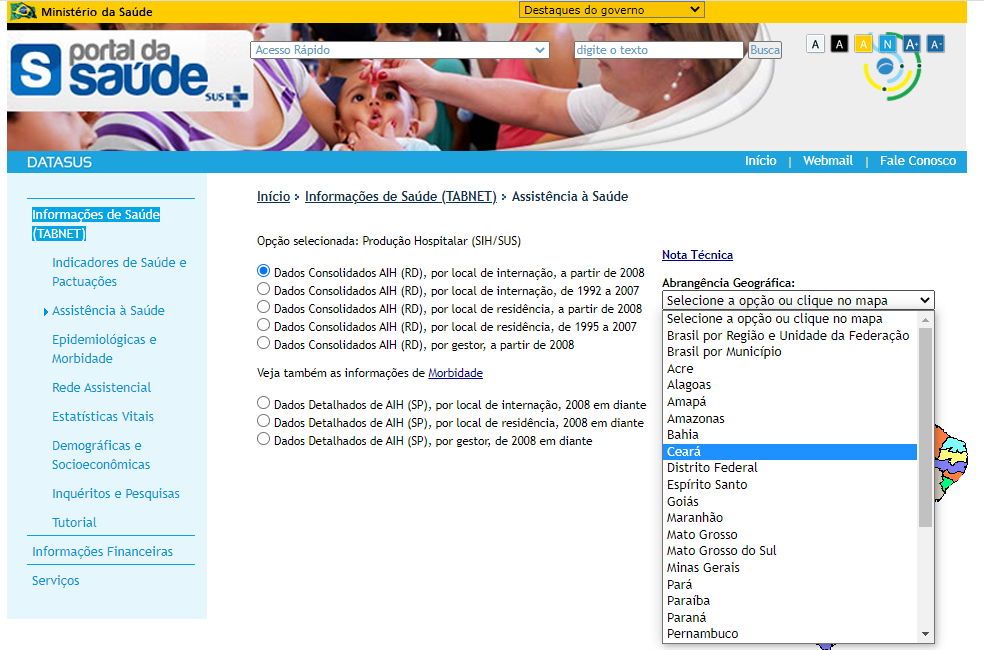

Após escolher o estado de interesse (no caso, Ceará), podemos escolher os dados de interesse (valor total dos gastos, total de internações, óbitos, etc...) bem como a janela de tempo desejada. Também podemos escolher por Município, Macro Região, Gestão, etc...

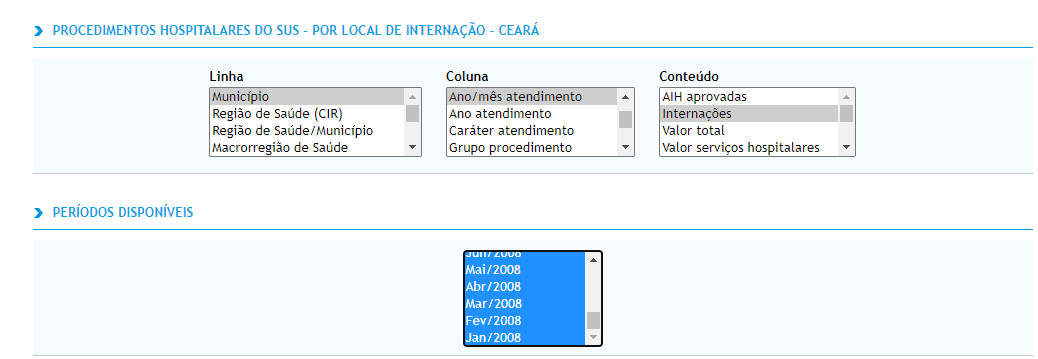

Após isso, podemos ainda (se for de interesse) filtrar por diversos campos. No nosso caso, estavamos interessando apenas em procedimentos relacionados à dengue (o objetivo do estudo). Então esses filtros foram aplicados. 

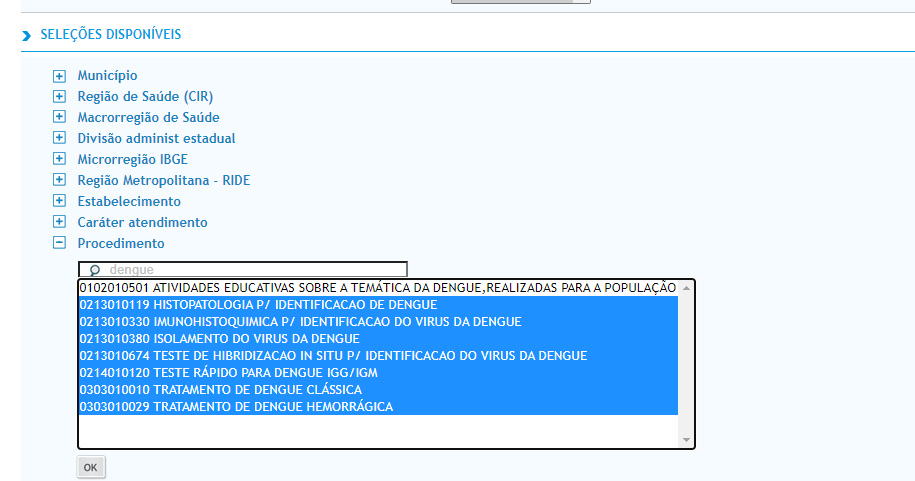

Após isso é gerada uma tabela com os dados requeridos. Essa tabela pode ser salva no formato csv.

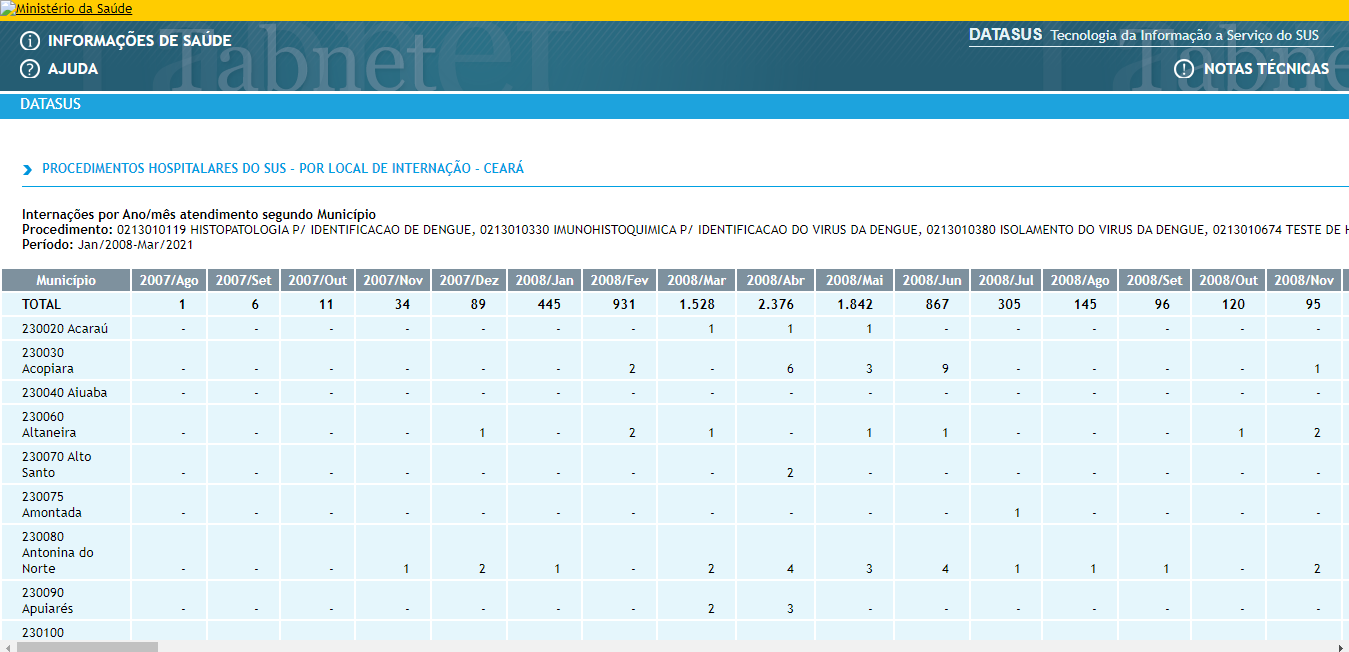

Utilizando o programa Sublime Text podemos visualizar facilmente o arquivo csv baixado, fazer edições e tratamentos preliminares e verificar informações como por exemplo o separador utilizado (no caso, ponto-e-vírgula).
No print abaixo, eu já havia deletado as linhas inicias e finais, que serviam de preâmbulo e rodapé para o arquivo. Assim, não haverá necessidade de tratar isso nos códigos. 

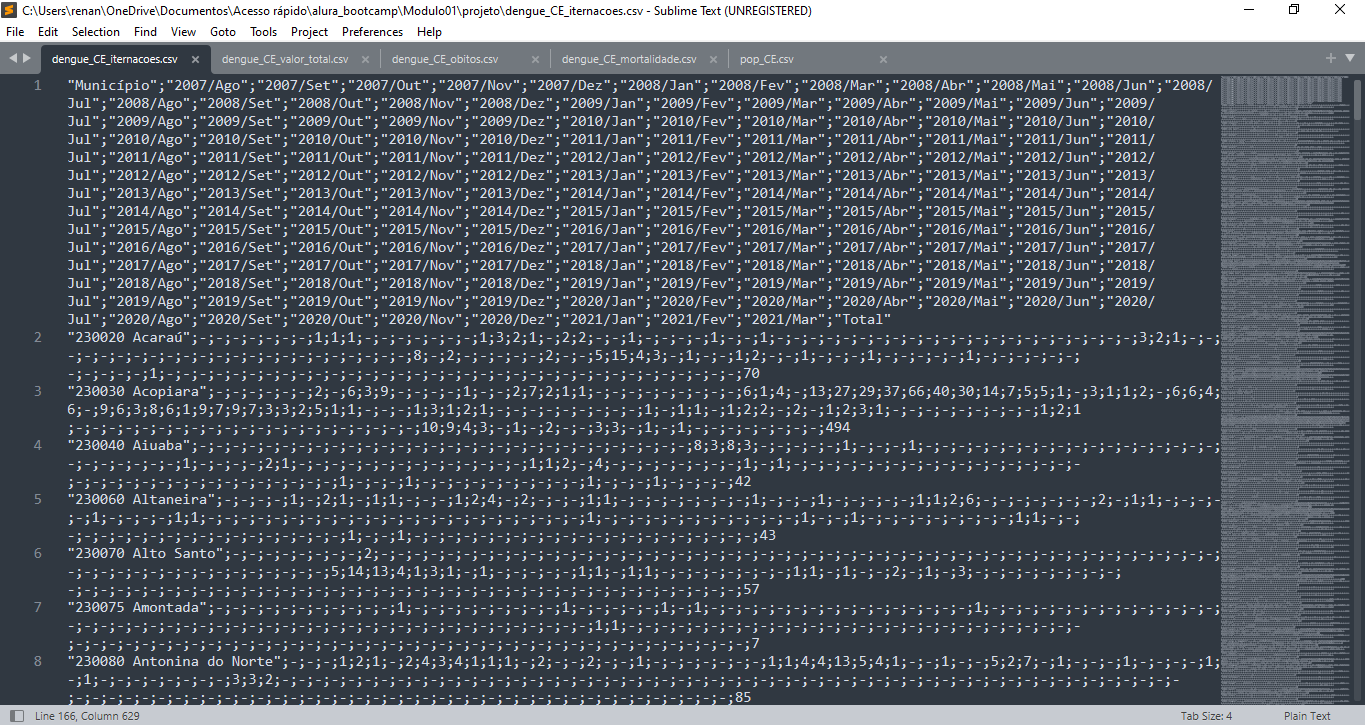

Para quem tiver interesse em conhecer mais o Sublime Text, deixo o link para o [site oficial](https://www.sublimetext.com/). 

## Sobre a dengue

A dengue é uma doença tropical com carácter sazonal, causada por um vírus da família Flaviviridae. Essa família inclui ainda vírus causadores de outras doenças bem conhecidas, a saber, febre amarela, febre zica e hepatite C.

O vírus é transmitido através de vetores, em geral mosquitos do gênero *Aedes*, sendo o *Aedes aegypti* o mais conhecido. A espécie também é responsável pela transmissão dos vírus da febre amarela, febre zica e chicungunha.

[Estudos](https://docs.bvsalud.org/biblioref/2018/04/883013/doi-1021115_jbesv9n3p267-76.pdf) relatam que a forma mais eficiente  e barata de combate à dengue é o combate ao vetor transmissor. Apesar disso, os gastos com tratamento tem grande impacto nos cofres do governo, segundo essa [fonte](hhttps://portugues.medscape.com/verartigo/6502026). 

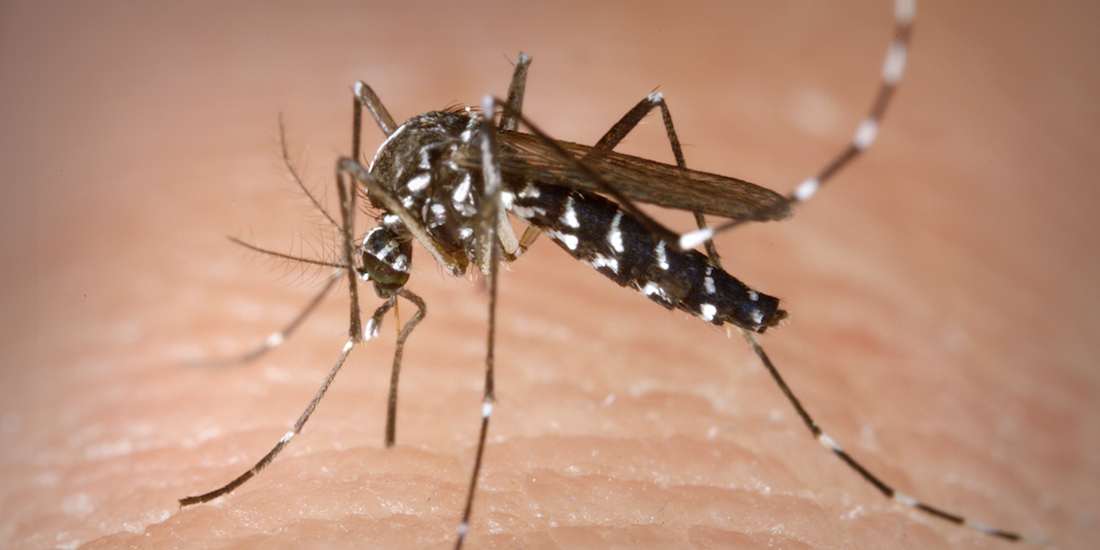

**Sintomas**

A maioria dos infectados são assintomáticos ou apresentam sintoma bem leves. Alguns poucos evoluem para casos mais graves, dos quais menos ainda elovuem para morte. O período de incubaçao é de aproximadamente uma semana. 

Os principais sintomas são:
- Febre alta
- Erupções cutâneas
- Dores musculares e articulares
- Fadiga
- Náusea 

Caso o quadro evolua para dengue hemorrágica, os sintomas ainda incluem:
- Sangramento
- Baixo nível de plaqueta no sangue


# Importação e tratamento inicial

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore') #ignora os avisos

Vamos agora importar e fazer a tratamento inicial dos dados dos quatro arquivos csv baixados. Os arquivos contém os seguintes dados relativos à dengue, na janela de tempo Jan/2008 à Mar/2021:
- Total de internações
- Total gasto (com procedimentos hospitaliares)
- Número de óbitos
- Taxa de mortalidade

Imporante notar que nas colunas constará ano/mês de atendimento. Porém, esses valores mudam, já que os dados não foram todos precessados ainda. Por isso, se for refazer essa análise, aconselhamos baixar os dados atualizados. 

Alguns campos nos dataframes aparecem com símbolos especiais. Segundo a legenda do próprio DATASUS, temos:

'...'	-> Dado numérico não disponível.

'-'	-> Dado numérico igual a 0 não resultante de arredondamento.

0; 0,0	-> Dado numérico igual a 0 resultante de arredondamento de um dado originalmente positivo.



## Internações

In [253]:
dados_internacoes = pd.read_csv('/content/dengue_CE_iternacoes.csv', delimiter=';', encoding="ISO-8859-1", thousands='.', decimal=',')

In [254]:
dados_internacoes

,Município,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,230020 Acaraú,-,-,-,-,-,-,-,1,1,1,-,-,-,-,-,-,-,1,3,2,1,-,2,2,-,-,1,-,-,-,-,1,-,-,1,-,-,-,-,...,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,70
1,230030 Acopiara,-,-,-,-,-,-,2,-,6,3,9,-,-,-,-,1,-,-,2,7,2,1,1,-,-,-,-,-,-,-,-,-,6,1,4,-,13,27,29,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,10,9,4,3,-,1,-,2,-,-,3,3,-,1,-,1,-,-,-,-,-,-,-,-,494
2,230040 Aiuaba,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,8,3,8,3,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,-,1,-,-,-,-,-,-,-,-,-,-,1,-,-,-,1,-,-,-,-,42
3,230060 Altaneira,-,-,-,-,1,-,2,1,-,1,1,-,-,-,1,2,4,-,2,-,-,-,1,1,-,-,-,-,-,-,-,-,1,-,-,-,1,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,43
4,230070 Alto Santo,-,-,-,-,-,-,-,-,2,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,231390 Uruoca,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1
161,231395 Varjota,-,-,-,-,-,5,1,-,3,1,2,-,-,-,-,1,-,1,2,7,1,2,1,-,2,-,-,-,-,-,-,4,-,-,-,-,-,-,-,...,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,125
162,231400 Várzea Alegre,-,-,-,-,-,-,-,-,10,10,1,-,-,-,1,-,-,-,-,-,-,3,-,-,-,-,-,-,-,-,-,1,1,-,1,-,1,1,-,...,-,-,1,2,1,2,5,-,-,-,-,-,-,-,-,1,1,5,3,1,-,-,-,-,-,-,-,-,4,3,-,-,-,-,-,-,-,-,-,379
163,231410 Viçosa do Ceará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,1,2,-,-,-,-,1,1,1,2,-,-,21


Observamos vários dados faltantes, não resultantes de arredondamento. 

Precisamos fazer um tratamento nesse dataframe. Primeiro, vamos remover a coluna 'Total' (pois pode atrapalhar visualizações gráficas) e retirar os códigos dos municípios da frente do nome dos municípios. 

In [255]:
dados_internacoes = dados_internacoes[:-1] #Remove a última linha, a saber, 'Total'

In [256]:

nomes_municipios = []
for i in range(0,dados_internacoes.shape[0]):
  lista =  dados_internacoes['Município'][i].split() #divide a string em uma lista com os 'pedaços' da string (seperados por espaço)
  del lista[0]                                       # deleta o primeiro elemento da lista de strings (no caso, o código do município)
  elemento = " ".join(str(x) for x in lista)         # transforma a lista de strings restante em uma única string
  nomes_municipios.append(elemento)

dados_internacoes['Município'] = nomes_municipios

Referência usada:
https://stackoverflow.com/questions/5618878/how-to-convert-list-to-string

Vejamos os tipos dos dados:

In [257]:
dados_internacoes.dtypes

Município    object
2007/Ago     object
2007/Set     object
2007/Out     object
2007/Nov     object
              ...  
2020/Dez     object
2021/Jan     object
2021/Fev     object
2021/Mar     object
Total         int64
Length: 166, dtype: object

Vemos então que os campos não são numéricos, mas estão no formato de string (objetc). Precisamos transformar essas strings em números (inteiros, no caso). 

In [258]:
dados_internacoes.drop('Total', axis = 1, inplace=True)
dados_internacoes =  dados_internacoes.set_index('Município')
dados_internacoes.replace('-', 0, inplace=True)
dados_internacoes.replace('...', np.nan, inplace=True)
dados_internacoes = dados_internacoes.astype(int)
dados_internacoes

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acaraú,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,3,2,1,0,2,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Acopiara,0,0,0,0,0,0,2,0,6,3,9,0,0,0,0,1,0,0,2,7,2,1,1,0,0,0,0,0,0,0,0,0,6,1,4,0,13,27,29,37,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,9,4,3,0,1,0,2,0,0,3,3,0,1,0,1,0,0,0,0,0,0,0,0
Aiuaba,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3,8,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
Altaneira,0,0,0,0,1,0,2,1,0,1,1,0,0,0,1,2,4,0,2,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alto Santo,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruburetama,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Uruoca,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Varjota,0,0,0,0,0,5,1,0,3,1,2,0,0,0,0,1,0,1,2,7,1,2,1,0,2,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Agora sim o dataframe está tratato. 
Observe que temos um total de 164 colunas, ou seja, 164 municípios. Porém o estado do Ceará possui 184 municípios. Portanto, temos dados faltantes e precisaremos ter cuidado com isso no futuro.

Faremos a importação e tratamento dos demais dataframes sem muitos comentários, pois é tudo muito similar.

##Valor total

In [259]:
dados_valor_total = pd.read_csv('/content/dengue_CE_valor_total.csv', delimiter=';', encoding="ISO-8859-1", thousands='.', decimal=',')

In [260]:
dados_valor_total = dados_valor_total[:-1]

In [261]:
nomes_municipios = []
for i in range(0,dados_valor_total.shape[0]):
  lista =  dados_valor_total['Município'][i].split() 
  del lista[0]                                       
  elemento = " ".join(str(x) for x in lista)         
  nomes_municipios.append(elemento)

dados_valor_total['Município'] = nomes_municipios

In [262]:
dados_valor_total.drop('Total', axis = 1, inplace=True)
dados_valor_total =  dados_valor_total.set_index('Município')
dados_valor_total.replace('-', 0, inplace=True)
dados_valor_total.replace('...', np.nan, inplace=True)
dados_valor_total =  dados_valor_total.replace(',','.', regex=True) #ver o comentário abaixo
dados_valor_total = dados_valor_total.astype(float)
dados_valor_total


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acaraú,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.6,285.60,277.60,0.0,0.0,0.0,0.0,0.00,0.00,0.00,287.76,927.28,575.52,287.76,0.00,575.52,623.52,0.00,0.0,287.76,0.0,0.0,0.0,0.00,311.76,0.00,0.00,287.76,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,287.76,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Acopiara,0.0,0.0,0.0,0.0,0.0,0.0,523.2,0.0,1569.60,800.80,2354.4,0.0,0.0,0.0,0.00,287.76,0.00,0.00,575.52,2054.32,575.52,287.76,287.76,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,1814.56,287.76,1175.04,0.0,3884.88,8033.52,8585.04,11151.12,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2909.60,2717.84,1167.04,903.28,0.00,311.76,0.0,575.52,0.0,0.0,887.28,911.28,0.00,311.76,0.00,311.76,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Aiuaba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,2302.08,863.28,2302.08,863.28,0.00,0.0,0.00,0.00,0.00,287.76,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,287.76,0.00,0.00,0.00,303.76,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,287.76,0.0,0.0,0.00,287.76,0.00,0.00,0.0,0.0
Altaneira,0.0,0.0,0.0,0.0,261.6,0.0,523.2,261.6,0.00,261.60,261.6,0.0,0.0,0.0,261.60,549.36,1151.04,0.00,575.52,0.00,0.00,0.00,287.76,287.76,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,287.76,0.00,0.00,0.0,287.76,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,287.76,0.00,0.00,287.76,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Alto Santo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,515.28,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruburetama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,555.2,0.00,0.00,0.0,0.0,0.0,0.0,261.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Uruoca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0
Varjota,0.0,0.0,0.0,0.0,0.0,1324.0,277.6,0.0,784.80,261.60,5

Nesse dataframe, tivemos um problema com o método replace(), que não estava funcionando corretamente. Após uma pesquisa, cheguei nesse [link](https://stackoverflow.com/questions/37593550/replace-method-not-working-on-pandas-dataframe), que sugere passar o parâmetro regex = True.

Funcionou, embora eu não tenha entendido exatamente o porquê, mesmo após ler a [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html).

## Óbitos

In [263]:
dados_obitos = pd.read_csv('/content/dengue_CE_obitos.csv', delimiter=';', encoding="ISO-8859-1", thousands=".", decimal=",")

In [264]:
dados_obitos = dados_obitos[:-1]

In [265]:
nomes_municipios = []
for i in range(0,dados_obitos.shape[0]):
  lista =  dados_obitos['Município'][i].split() 
  del lista[0]                                       
  elemento = " ".join(str(x) for x in lista)         
  nomes_municipios.append(elemento)

dados_obitos['Município'] = nomes_municipios

In [266]:
dados_obitos.drop('Total', axis = 1, inplace=True)
dados_obitos =  dados_obitos.set_index('Município')
dados_obitos.replace('-', 0, inplace=True)
dados_obitos.replace('...', np.nan, inplace=True)
dados_obitos =  dados_obitos.replace(',','.')
dados_obitos = dados_obitos.astype(int)
dados_obitos

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Set,2008/Out,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Set,2009/Nov,2009/Dez,2010/Jan,2010/Jun,2010/Set,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Dez,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Ago,2012/Nov,2012/Dez,...,2014/Jun,2014/Ago,2014/Set,2014/Out,2014/Nov,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Nov,2017/Dez,2018/Jun,2019/Mai,2019/Jun,2020/Jan,2020/Abr,2021/Jan
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aracati,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Barbalha,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
Beberibe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Boa Viagem,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brejo Santo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0
Canindé,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Cascavel,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
Caucaia,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Crato,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Mortalidade

In [267]:
dados_mortalidade = pd.read_csv('/content/dengue_CE_mortalidade.csv', delimiter=';', encoding="ISO-8859-1", thousands=".", decimal=",")

In [268]:
dados_mortalidade = dados_mortalidade[:-1]

In [269]:
nomes_municipios = []
for i in range(0,dados_mortalidade.shape[0]):
  lista =  dados_mortalidade['Município'][i].split() 
  del lista[0]                                       
  elemento = " ".join(str(x) for x in lista)         
  nomes_municipios.append(elemento)

dados_mortalidade['Município'] = nomes_municipios

In [270]:
dados_mortalidade.drop('Total', axis = 1, inplace=True)
dados_mortalidade =  dados_mortalidade.set_index('Município')
dados_mortalidade.replace('-', 0, inplace=True)
dados_mortalidade.replace('...', np.nan, inplace=True)
dados_mortalidade =  dados_mortalidade.replace(',','.', regex=True)
dados_mortalidade = dados_mortalidade.astype(float)
dados_mortalidade

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Set,2008/Out,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Set,2009/Nov,2009/Dez,2010/Jan,2010/Jun,2010/Set,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Dez,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Ago,2012/Nov,2012/Dez,...,2014/Jun,2014/Ago,2014/Set,2014/Out,2014/Nov,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Nov,2017/Dez,2018/Jun,2019/Mai,2019/Jun,2020/Jan,2020/Abr,2021/Jan
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aracati,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,NaN,NaN,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,14.29,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,NaN,0.0,...,0.00,0.0,0.00,0.00,0.0,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,NaN,0.00,0.00,0.0,0.00,0.00,NaN,0.0,0.0,0.00,0.00,9.09,0.00,NaN,NaN,NaN,NaN,0.00,0.0,NaN,0.00,0.00
Barbalha,NaN,NaN,0.00,0.00,10.00,0.00,NaN,0.0,0.00,0.00,25.00,0.00,0.00,0.00,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,20.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,...,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,NaN,0.00,NaN,0.0,0.00,0.00,100.0,0.00,NaN,NaN,NaN,NaN,100.00,0.00,NaN,NaN,NaN,NaN,NaN,0.0,0.00,NaN,NaN,6.25,NaN
Beberibe,NaN,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,NaN,0.00,0.00,0.0,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,...,0.00,NaN,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,25.00,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,0.0,NaN,0.00,NaN
Boa Viagem,NaN,NaN,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,NaN,NaN,0.0,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.0,25.00,0.00,0.00,NaN,0.0,0.0,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN
Brejo Santo,0.00,0.00,0.00,0.00,0.00,0.00,0.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,50.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,NaN,0.0,14.29,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,25.0,0.0,0.0,0.00,1.54,3.28,0.00,0.00,NaN,NaN,0.0,0.00,0.0,0.0,0.00,0.00
Canindé,0.00,5.26,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN,0.00,NaN,0.00,NaN,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,NaN,NaN,...,0.00,20.0,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.00,NaN,NaN,0.00,0.00,0.0,NaN,0.0,0.00,NaN,20.00,0.00,0.00,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN
Cascavel,0.00,0.00,0.00,0.00,0.00,5.88,0.0,0.0,0.00,0.00,NaN,33.33,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,33.33,0.00,0.00,0.00,0.00,0.00,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.00,0.00,0.0,0.0,NaN,...,0.00,0.0,0.00,NaN,0.0,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,NaN,NaN,0.0,NaN,0.00,0.00,NaN,0.00,NaN,0.0,0.0,0.0,20.00,0.00,0.00,NaN,NaN,NaN,NaN,0.0,NaN,0.0,50.0,0.00,NaN
Caucaia,0.00,0.00,0.00,1.27,0.00,6.25,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,NaN,0.00,0.00,0.00,0.00,8.33,2.63,0.00,4.08,0.00,13.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,25.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,NaN,0.00,100.0,0.0,0.00,0.00,0.0,0.00,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.0,NaN,NaN
Crato,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

Percebemos que os dataframes não possuem todos as mesmas colunas. De fato, dados_obitos e dados_mortalidade começam em 2008/Jan enquanto que dados_valor_total e dados_internacoes começam em 2007/Ago.
Vamos padronizar tudo e dropar as primeiras colunas dos dois últimos dataframes

In [271]:
dados_valor_total.drop(dados_valor_total.columns[0:5], axis = 1, inplace=True)
dados_internacoes.drop(dados_internacoes.columns[0:5], axis = 1, inplace=True)

## Infos

Vejamos agora uma rápida análise dos tipos de dados:

In [272]:
dados_internacoes.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 2008/Jan to 2021/Mar
Columns: 164 entries, Acaraú to Viçosa do Ceará
dtypes: int64(164)
memory usage: 205.0+ KB


In [273]:
dados_valor_total.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 2008/Jan to 2021/Mar
Columns: 164 entries, Acaraú to Viçosa do Ceará
dtypes: float64(164)
memory usage: 205.0+ KB


In [274]:
dados_obitos.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 2008/Jan to 2021/Jan
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Aracati               95 non-null     int64
 1   Barbalha              95 non-null     int64
 2   Beberibe              95 non-null     int64
 3   Boa Viagem            95 non-null     int64
 4   Brejo Santo           95 non-null     int64
 5   Canindé               95 non-null     int64
 6   Cascavel              95 non-null     int64
 7   Caucaia               95 non-null     int64
 8   Crato                 95 non-null     int64
 9   Farias Brito          95 non-null     int64
 10  Fortaleza             95 non-null     int64
 11  Icó                   95 non-null     int64
 12  Iguatu                95 non-null     int64
 13  Itapipoca             95 non-null     int64
 14  Jaguaribara           95 non-null     int64
 15  Juazeiro do Norte     95 non-null     int64
 16  La

In [275]:
dados_mortalidade.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 2008/Jan to 2021/Jan
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aracati               77 non-null     float64
 1   Barbalha              57 non-null     float64
 2   Beberibe              59 non-null     float64
 3   Boa Viagem            54 non-null     float64
 4   Brejo Santo           90 non-null     float64
 5   Canindé               65 non-null     float64
 6   Cascavel              65 non-null     float64
 7   Caucaia               80 non-null     float64
 8   Crato                 84 non-null     float64
 9   Farias Brito          27 non-null     float64
 10  Fortaleza             95 non-null     float64
 11  Icó                   61 non-null     float64
 12  Iguatu                87 non-null     float64
 13  Itapipoca             74 non-null     float64
 14  Jaguaribara           12 non-null     float64
 15  Juazeiro do Norte

Vemos então que no caso da mortalidade, há municípios com dados nulos. 
Ainda sobre mortalidade, vejamos se esses dados então de fato em percentual. Para isso, podemos usar um describe()

In [276]:
dados_mortalidade.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Set,2008/Out,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Set,2009/Nov,2009/Dez,2010/Jan,2010/Jun,2010/Set,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Out,2011/Nov,2011/Dez,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Ago,2012/Nov,2012/Dez,...,2014/Jun,2014/Ago,2014/Set,2014/Out,2014/Nov,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Nov,2017/Dez,2018/Jun,2019/Mai,2019/Jun,2020/Jan,2020/Abr,2021/Jan
count,17.000000,19.000000,24.000000,27.000000,26.000000,24.000000,21.000000,16.000,12.000000,18.000000,20.0000,15.000000,19.000000,15.00000,10.000000,10.000000,12.000000,11.000000,17.000000,17.000000,20.00000,19.000000,23.000000,24.000000,24.000000,24.000000,26.000000,25.000000,21.000000,19.000000,15.000000,19.000000,19.000000,23.000000,24.00000,25.000000,22.000000,20.00000,13.000000,13.000000,...,24.000000,22.000000,17.000000,15.000000,20.000000,15.000000,18.000000,24.000000,25.000000,25.000000,27.000000,23.000000,22.000000,19.000000,18.000000,16.00000,14.000000,18.000000,21.000000,25.000000,21.000000,17.000000,21.000000,13.000000,7.000000,12.000000,13.000000,14.000000,20.000000,17.000000,19.000000,20.000000,10.000000,7.000000,15.000000,17.000000,17.000000,7.000000,16.00000,8.000000
mean,1.484118,0.312632,0.453750,0.061481,0.945000,0.540833,0.038095,0.125,0.140833,0.120556,1.4675,2.494000,0.244737,0.23800,5.000000,0.455000,0.194167,0.174545,0.255882,0.094706,0.04700,5.343158,1.834783,0.564167,1.109167,0.865417,0.228846,5.242000,0.035238,3.383684,0.085333,0.877368,2.412105,0.331739,0.02000,1.349200,0.220455,2.50000,0.961538,7.692308,...,0.027917,0.909091,0.653529,4.444667,3.750000,1.303333,1.919444,3.692500,1.911200,1.217200,1.709259,0.020870,4.545455,1.535263,3.703889,0.18375,1.190714,5.705556,2.380952,0.311600,5.041905,5.882353,0.066190,1.042308,3.571429,4.166667,3.846154,8.675000,2.779500,1.937647,2.587895,1.934500,5.000000,14.285714,13.333333,0.054706,1.176471,7.142857,0.46000,0.403750
std,4.332563,1.208143,1.458927,0.252902,3.352992,1.711081,0.174574,0.500,0.487861,0.511474,5.6235,8.594993,1.066783,0.92177,15.811388,1.438836,0.672613,0.578902,1.055030,0.390482,0.21019,22.924845,7.081158,2.086251,4.085235,2.100623,1.035028,20.176013,0.161481,11.753645,0.330495,3.824360,8.015929,1.396088,0.09798,6.663146,0.838175,11.18034,3.466876,27.735010,...,0.136763,4.264014,2.694571,17.214120,12.234012,3.839564,6.085472,11.980643,6.902053,5.064818,5.529108,0.100087,21.320072,5.761970,12.201617,0.73500,4.455245,23.541365,10.910895,0.970763,21.795341,24.253563,0.303323,3.099226,9.449112,14.433757,13.867505,26.816361,8.458152,5.183419,8.131724,7.486032,15.811388,37.796447,35.186578,0.225558,4.850713,18.898224,1.56863,1.141977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

Percebemos então, olhando a columa max, que temos valores maiores que 1. Portanto, a mortalidade está em percentual, não apenas o valor absoluto entre 0 e 1.

# Análise dos dados (valores absolutos)

Nessa sessão, faremos uma análise descritiva e gráfica dos dados baixados e levantar algumas hipóteses.

## Valor gasto

Vejamos primeiro os municípios que mais gastaram no combate à dengue:

In [277]:
dados_valor_total.T.sum().sort_values(ascending = False)[0:10]

Município
Fortaleza       5784344.51
Missão Velha     735323.78
Brejo Santo      572050.39
Itapipoca        521625.39
Iguatu           424157.60
Russas           403237.91
Crato            375463.09
Tauá             345389.67
Crateús          314981.60
Novo Oriente     303127.60
dtype: float64

Como era de se esperar, a capital teve maior volume de gastos, devido à grande população e densidade demográfica. 
Vamos observar isso em um gráfico de barras:

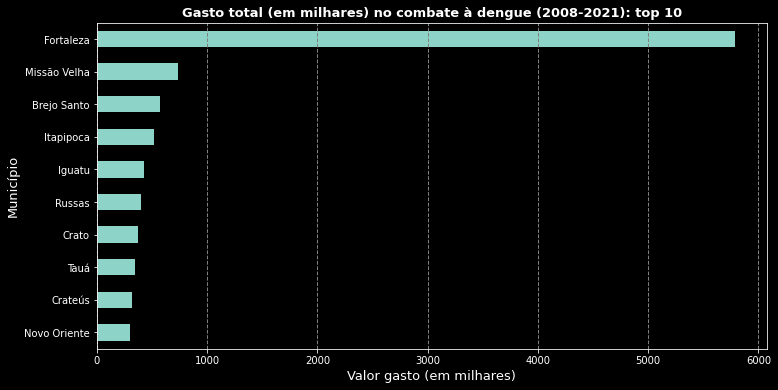

In [278]:
ax = (dados_valor_total.T.sum().sort_values(ascending = False)/1000)[0:10].plot(kind = 'barh', figsize = (12,6))
plt.gca().invert_yaxis()
plt.style.use('dark_background')
plt.grid(axis = 'x', linestyle = '--', linewidth = 1, color = 'grey')
plt.title('Gasto total (em milhares) no combate à dengue (2008-2021): top 10', fontdict={'fontsize': 13, 'fontweight': 'bold', 'color':'w'})
plt.xlabel('Valor gasto (em milhares)', fontdict={'fontsize': 13, 'color': 'w'})
plt.ylabel('Município', fontdict={'fontsize': 13, 'color': 'w'})
plt.show()

Observando no gráfico agora temos uma noção mais precisa da ordem de grandeza. Já sabíamos que Fortaleza tinha o maior gasto, mas ler e comparar valores numéricos, embora seja um procedimento preciso, às vezes não nos dá a real dimensão das grandezas. Olhando o gráfico acima vemos que Fortaleza gastou mais de 5 vezes o valor do segundo lugar, Missão Velha (basta observar as linhas de grade verticais). É claro que tínhamos essa informação numérica na tabela acima, porém para obtê-la, é preciso efetuar o cálculo:

$\frac{5784344.51}{735323.78} = 7.86$

Esse é um método, como falei, preciso e cirúrgico: temos o valor exato da razão. A nossa estimativa inicial, olhando apenas para o gráfico, é inclusive menor que o valor real. Porém, a depender dos propósitos, ainda é uma estimativa boa. A mente humana é muito mais visual que numérica. Por isso que um gráfico (bem feito) é bom para passar informações. 

Uma maneira de deixar o gráfico acima mais legível seria alterar as linhas de grade verticiais para assim podermos fazer uma melhor contagem visual. Por exemplo:

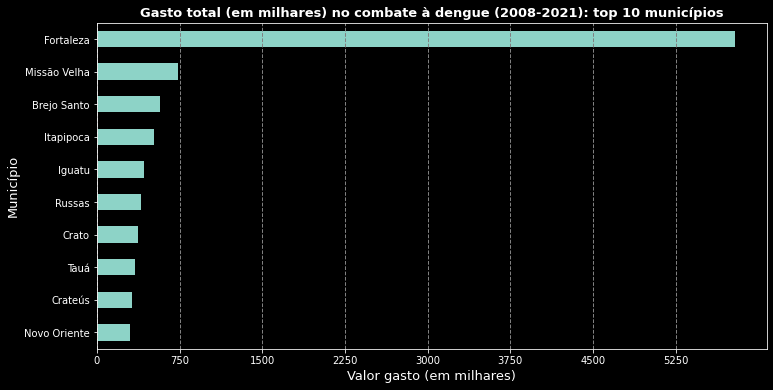

In [279]:
ax = (dados_valor_total.T.sum().sort_values(ascending = False)/1000)[0:10].plot(kind = 'barh', figsize = (12,6))
plt.gca().invert_yaxis()
plt.style.use('dark_background')
plt.grid(axis = 'x', linestyle = '--', linewidth = 1, color = 'grey')
plt.title('Gasto total (em milhares) no combate à dengue (2008-2021): top 10 municípios', fontdict={'fontsize': 13, 'fontweight': 'bold', 'color':'w'})
plt.xlabel('Valor gasto (em milhares)', fontdict={'fontsize': 13, 'color': 'w'})
plt.ylabel('Município', fontdict={'fontsize': 13, 'color': 'w'})
plt.xticks(np.arange(0,6000,750))  #passa os parâmetros dos valores usados no eixo x
plt.show()

Agora sim é possível visualizar bem mais claramente que valor total gasto em Fortaleza é mais de 7 vezes o valor total gasto em Missão Velha.

Podemos ver o gráfico do gasto médio ao longo dos anos:

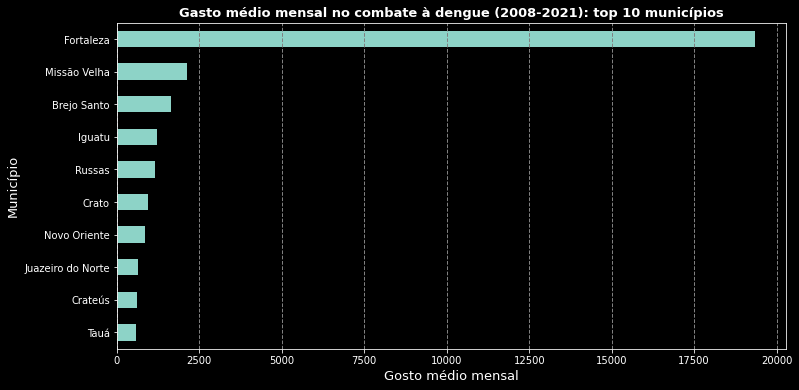

In [280]:
ax = dados_valor_total.median(axis=1).sort_values(ascending = False)[0:10].plot(kind = 'barh', figsize = (12,6))
plt.gca().invert_yaxis()
plt.grid(axis = 'x', linestyle = '--', linewidth = 1, color = 'grey')
plt.title('Gasto médio mensal no combate à dengue (2008-2021): top 10 municípios', fontdict={'fontsize': 13, 'fontweight': 'bold', 'color':'w'})
plt.xlabel('Gosto médio mensal', fontdict={'fontsize': 13, 'color': 'w'})
plt.ylabel('Município', fontdict={'fontsize': 13, 'color': 'w'})
plt.show()

Observe a mudança: alguns municípios que estavam no ranking top 10 de maiores gastos totais agora não estão no ranking top 10 maiores gastos médio mensais. Dependendo da probemática a ser tratada, o gestor ou tomador de decisão pode preferir utilizar uma ou outra informação para embasar suas decisões.

Podemos olhar gasto total em todo o estado, em um gráfico temporal:

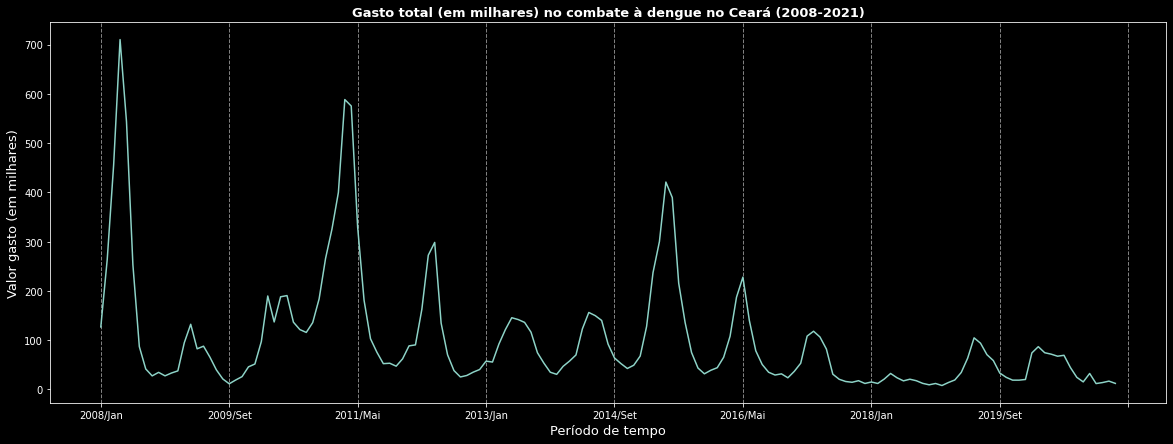

In [281]:
ax = (dados_valor_total.sum()/1000).plot(figsize = (20,7))
plt.grid(axis = 'x', linestyle = '--', linewidth = 1, color = 'grey')
plt.title('Gasto total (em milhares) no combate à dengue no Ceará (2008-2021)', fontdict={'fontsize': 13, 'fontweight': 'bold', 'color':'w'})
plt.xlabel('Período de tempo', fontdict={'fontsize': 13, 'color': 'w'})
plt.ylabel('Valor gasto (em milhares)', fontdict={'fontsize': 13, 'color': 'w'})
plt.show()

Como esperado, observamos uma sazonaliade dos valores. Dengue é uma epidemia de caráter sazonal: ela tende a afetar mais a população nos períodos de chuva, que corresponde aos meses iniciais do ano. Assim, espera-se maiores gastos nesses meses. É exatamente esse comportamento observado no gráfico. 

Outra leitura que fazemos do gráfico é que se observa uma diminuição dos valores. A hipótese mais simples é que o governo está investindo menos no combate à dengue, seja por cortes no orçamento, seja porque a doença vem sendo erradicada, ou qualquer outro motivo. Considerando válida essa hipótese, seria preciso analizar outras variáveis e/ou verificar outras informações (e.g., número de internações) para confirmar ou não a hipótese levantada.

Porém, é trabalho de quem está analisando os dados verificar a documentação, a fonte original dos dados ou averiguar junto a outro setores da empresa, por exemplo, se não há outra explicação menos óbiva para aquilo que está sendo observado graficamente. Muitas vezes, hipóteses menos imediatas, após uma ponderação mais profunda, se mostram mais viáveis ou mesmo corretas. É o caso da nossa fonte de dados. Nosso dataframe contém informações por ano/mês de atendimento. Porém, como já mencionado antes, os dados demoram para ser processado e inseridos no banco de dados. Dados mais recentes de atendimento provavelmente ainda não foram processados, o que só será feito daqui alguns meses. Por esse motivo é bastante razoável esperar uma queda dos valores nos meses mais recentes, não apenas nesse dataframe, como em todos os outros que serão analizados nesse notebook. 


O código abaixo coleta os 20 meses com maiores gastos:

In [282]:
dados_valor_total.sum().sort_values(ascending = False)[0:20]

2008/Abr    710050.74
2011/Mar    588286.80
2011/Abr    575217.85
2008/Mai    543738.25
2008/Mar    455542.83
2015/Mai    420817.20
2011/Fev    399714.89
2015/Jun    389383.63
2011/Mai    329123.05
2011/Jan    325361.51
2015/Abr    300205.15
2012/Mai    298330.17
2012/Abr    272298.10
2010/Dez    265600.75
2008/Fev    263609.72
2008/Jun    252718.98
2015/Mar    237090.87
2016/Mai    227851.13
2015/Jul    215566.04
2010/Jun    190403.52
dtype: float64

Percebemos então que realmente os maiores gastos se concentraram nos meses de Abril e Maio. Esse tipo de informação pode ser usada pelo gestor para organizar e planejar o orçamento dos próximos meses: se se espera uma maior gasto com combate à dengue nos meses de Abril e Maio, então reserva-se mais orçamento para esses meses. 

## Óbitos e internações

Vejamos agora os municípios com mais óbitos por dengue, no período de 2008 a 2020:

In [283]:
dados_obitos.T.sum().sort_values(ascending = False)[0:10]

Município
Fortaleza      96
Itapipoca      31
Maranguape     11
Caucaia        11
Maracanaú      11
Sobral          8
Barbalha        6
Brejo Santo     6
Quixadá         5
Crato           5
dtype: int64

Não é uma surpresa a capital estar em primeiro lugar, devido a densidade demográfica e a população absoluta. Caucaia, meu município natal, figura em 4º lugar. 
Vejamos essas informações em um gráfico.

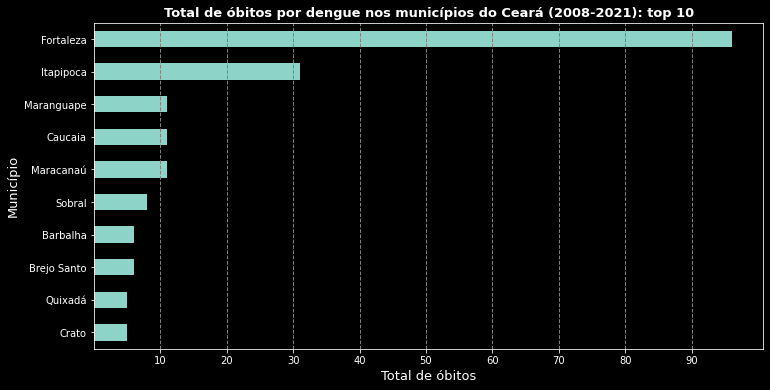

In [284]:
ax = dados_obitos.T.sum().sort_values(ascending = False)[0:10].plot(kind = 'barh', figsize = (12,6))
plt.gca().invert_yaxis()
plt.style.use('dark_background')
plt.style.use('dark_background')
plt.grid(axis = 'x', linestyle = '--', linewidth = 1, color = 'grey')
plt.title('Total de óbitos por dengue nos municípios do Ceará (2008-2021): top 10', fontdict={'fontsize': 13, 'fontweight': 'bold', 'color':'w'})
plt.xlabel('Total de óbitos', fontdict={'fontsize': 13, 'color': 'w'})
plt.ylabel('Município', fontdict={'fontsize': 13, 'color': 'w'})
plt.xticks(np.arange(10,100,10))
plt.show()

Vejamos agora os 10 municípios com maior quantidade de internações por dengue:

In [285]:
dados_internacoes.T.sum().sort_values(ascending = False)[0:10]

Município
Fortaleza       16756
Missão Velha     2554
Brejo Santo      1691
Itapipoca        1686
Iguatu           1400
Russas           1368
Tauá             1197
Crato            1163
Novo Oriente     1065
Crateús          1037
dtype: int64

Como era de se esperar novamente, Fortaleza figura em primeiro lugar. Curioso que Caucaia, que no ranking de óbitos aparecia em quarto lugar, aqui não aparece entre os 10 maiores. Isso significará uma taxa de mortalidade maior. 


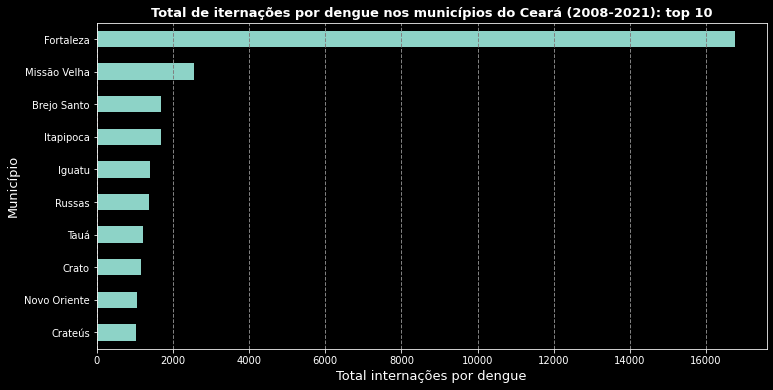

In [286]:
ax = dados_internacoes.T.sum().sort_values(ascending = False)[0:10].plot(kind = 'barh', figsize = (12,6))
plt.gca().invert_yaxis()
plt.style.use('dark_background')
plt.grid(axis = 'x', linestyle = '--', linewidth = 1, color = 'grey')
plt.title('Total de iternações por dengue nos municípios do Ceará (2008-2021): top 10', fontdict={'fontsize': 13, 'fontweight': 'bold', 'color':'w'})
plt.xlabel('Total internações por dengue', fontdict={'fontsize': 13, 'color': 'w'})
plt.ylabel('Município', fontdict={'fontsize': 13, 'color': 'w'})
plt.show()

Vejamos a evolução temporal das internações

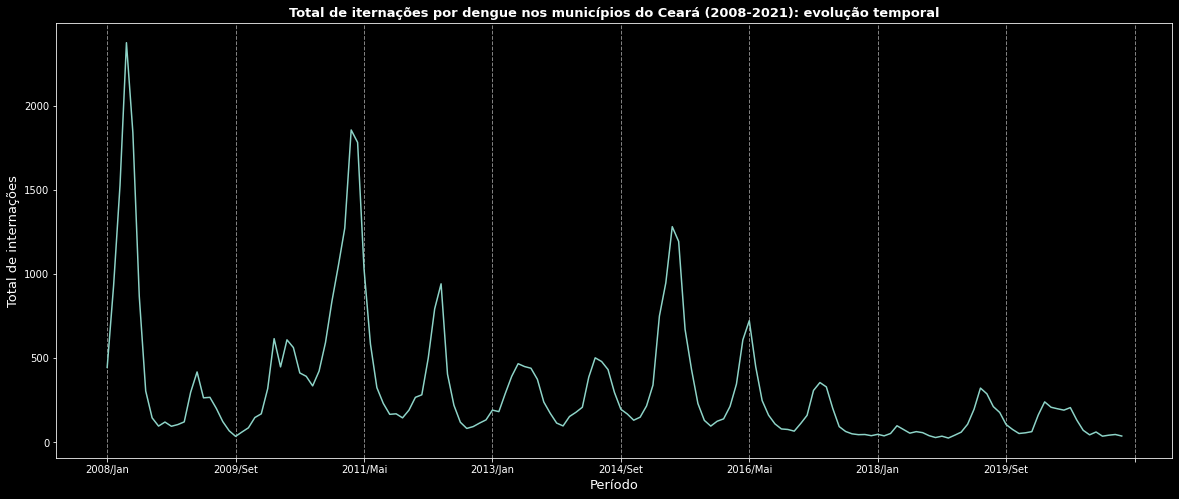

In [287]:
ax = dados_internacoes.sum().plot(figsize=(20,8))
plt.style.use('dark_background')
plt.grid(axis = 'x', linestyle = '--', linewidth = 1, color = 'grey')
plt.title('Total de iternações por dengue nos municípios do Ceará (2008-2021): evolução temporal', fontdict={'fontsize': 13, 'fontweight': 'bold', 'color':'w'})
plt.xlabel('Período', fontdict={'fontsize': 13, 'color': 'w'})
plt.ylabel('Total de internações', fontdict={'fontsize': 13, 'color': 'w'})
plt.show()

Novamente, como no valor total, observa-se uma sazonalidade: temos picos de internação no começo de cada ano. Temos também uma tendência de queda, mas como já explicamos, isso decorre do fato de que os dados ainda não foram todos processados.
Como antes, podemos verificar os meses com maiores picos de internações:

In [288]:
dados_internacoes.sum().sort_values(ascending = False)[0:20]

2008/Abr    2376
2011/Mar    1857
2008/Mai    1842
2011/Abr    1783
2008/Mar    1528
2015/Mai    1282
2011/Fev    1273
2015/Jun    1194
2011/Jan    1049
2011/Mai    1031
2015/Abr     948
2012/Mai     942
2008/Fev     931
2008/Jun     867
2010/Dez     838
2012/Abr     793
2015/Mar     750
2016/Mai     723
2015/Jul     671
2010/Mar     616
dtype: int64

Percebemos então, novamente, que temos picos nos meses de Março, Abril e Maio. Essas informações estão de acordo com o que observamos para o caso do valor total.

### Correlação

Existe uma métrica para medir o quanto duas variáveis tem relação uma com a outra: correlação de Pearson. Grosso modo, a correlação de Pearson mensura o quão similar é o comportamento das duas variáveis. 
Por exemplo, suponha que nossas variáveis sejam:

$ x = \mbox{venda de sorvetes}$

$y = \mbox{temperatura}$

É intuitivo pensar que, em dias quentes, as pessoas tem mais vontade de tomar sorverte. Logo, é razoável afirmar que se a temperatura aumenta, podemos esperar um aumento na venda de sorvetes. Nesse caso, as variáveis $x$ e $y$ possuem uma alta correlação positiva. 
Por outro lado, considere uma nova variável:

$z  = \mbox{venda de casacos de couro}$. 

É razoálve esperar um aumento das vendas de casacos na temporada fria. Assim, faz sentindo afirmar que quando a temperatura cai, a venda de casacos aumenta.  Nesse caso, as variáveis $y$ e $z$ possuem uma alta correlação negativa.

Em resumo:
- Correlação positiva ---> as variáveis variam na mesma direção: se uma aumenta, a outra aumenta; se uma diminui, a outra diminue. 
- Correlação negativa ----> as variáveis variam em direções opostas: se uma aumenta, a outra diminue; se uma diminui, a outra aumenta. 
- Correlação perto de zero ----> as variáveis não estão correlacionadas.

Importante observar que correlação não implica casualidade. Isto é, não é porque as variáveis se comportam de forma similar que uma delas é a causa da outra ou vice-versa. Elas podem ser causadas por um terceiro fator não considerado, ou ser apenas uma grande coincidência. Cabe a quem está analizando ponderar sobre isso, caso a caso. 

Provavelmente o melhor exemplo de que correlação não implica casualidade é o famoso gráfico que relaciona número de piratas no mundo com a temperatura média global:

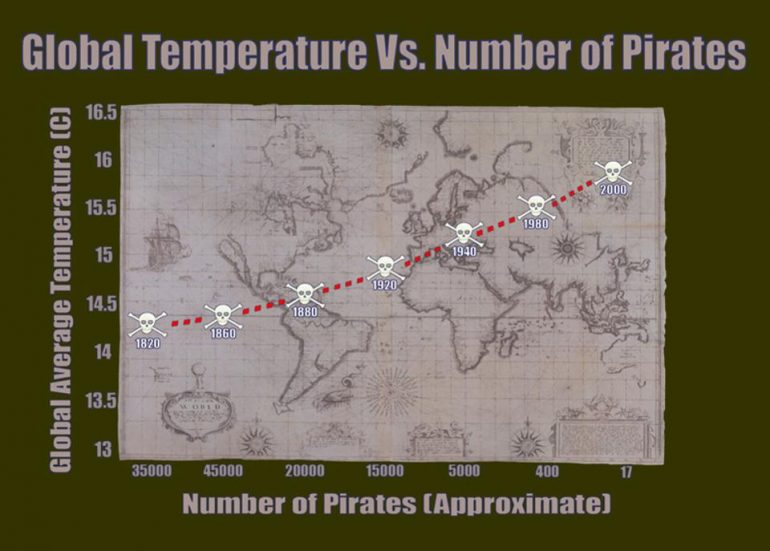

Qualquer pessoa sensata irá admitir que a causa do aquecimento global NÃO é a diminuição do número de piratas. 

Após essa breve explicação, vamos calcular a correlação entre valor total gasto e número total de internações (por ano). Para isso, podemos usar um método da biblioteca Numpy: corrcoef(). Esse método nos retornará uma matriz, com todas as correlações cruzadas das variáveis que inserirmos. 

In [289]:
#Criando as variáveis
x = dados_valor_total.sum()
y = dados_internacoes.sum()

#Calculando a correlação
np.corrcoef(x,y)

array([[1.        , 0.99820745],
       [0.99820745, 1.        ]])

Observamos então uma correlação de 99,8%, praticamente uma correlação perfeita. 

## A taxa de mortalidade

***O que é a taxa de mortalidade? ***


Segundo a [Wikipedia](https://pt.wikipedia.org/wiki/Taxa_de_mortalidade), *taxa de mortalidade* é um indicador *demográfico* que que é simplesmente o total de mortes por ano a cada 1000 pessoas:

$\mbox{taxa de mortalidade (demografica)} = 1000 \times \frac{\mbox{total de mortes em um ano}}{\mbox{populacao total}} $

Obviamente, não é essa taxa de mortalidade que estamos interessados. Queremos um indicador que mensure a severidade de uma doença (no nosso caso, dengue).

Segundo a [Wikipedia em inglês](https://en.wikipedia.org/wiki/Mortality_rate), a taxa de mortalidade também pode ser usada para uma causa específica, em vez de ser aplicada à população geral. A fórmula é a mesma acima. Assim, teríamos a taxa de mortalidade pela causa de morte: dengue.





Há, porém, outras duas métricas utilizadas para avaliar a severidade de uma doença: *Case Fatality Rate* (CFR), também conhecido como *letalidade*, e *Infection Fatality Rate* (IFR). As fórmulas são:

$\mbox{CFR (letalidade)} = 100 \times \frac{\mbox{total de mortes}}{\mbox{total de casos confirmados}}$

$\mbox{IFR} = 100 \times \frac{\mbox{total de mortes}}{\mbox{total de infectados}}$



Abaixo deixamos alguns links sobre esses conceitos:

https://iris.paho.org/bitstream/handle/10665.2/52650/OPASWBRACOVID-1920110_por%20%281%29.pdf?sequence=1&isAllowed=y


https://www.coronavirus.sc.gov.br/sobre-os-dados/

https://en.wikipedia.org/wiki/Case_fatality_rate



A primeira coisa que precisamos fazer é entender qual métrica está sendo usada no banco de dados sobre mortalidade da dengue que temos em mãos. Meu palpite é que estão usando uma versão da taxa de letalidade (CFR), já que dispomos de informações sobre múmero de óbitos e número de internações (que, para efeitos práticos, pode ser considerado como o número de casos confirmados). Para verificar isso, criaremos um dataframe auxiliar.

In [290]:
#Cria uma lista com os nomes do Municípios onde de fato ocorreram óbitos por dengue
municipios_obito =  dados_obitos.index.tolist()

In [291]:
#Cria um dataframe com os CRF dos municípios, por ano/mês
dados_CRF = 100*(dados_obitos / dados_internacoes.T[municipios_obito].T)

In [292]:
#Cria uma dataframe com as razões entre CFR e mortalidade.
mort_comp = dados_CRF/ dados_mortalidade

Espera-se então que se as métricas utilizadas forem as mesmas, as razões serão todas iguais a 1 (ou dados nulos). Vejamos se nossa hipótese procede:

In [293]:
mort_comp

,2008/Abr,2008/Ago,2008/Dez,2008/Fev,2008/Jan,2008/Jul,2008/Jun,2008/Mai,2008/Mar,2008/Nov,2008/Out,2008/Set,2009/Abr,2009/Ago,2009/Dez,2009/Fev,2009/Jan,2009/Jul,2009/Jun,2009/Mai,2009/Mar,2009/Nov,2009/Out,2009/Set,2010/Abr,2010/Ago,2010/Dez,2010/Fev,2010/Jan,2010/Jul,2010/Jun,2010/Mai,2010/Mar,2010/Nov,2010/Out,2010/Set,2011/Abr,2011/Ago,2011/Dez,2011/Fev,...,2017/Set,2018/Abr,2018/Ago,2018/Dez,2018/Fev,2018/Jan,2018/Jul,2018/Jun,2018/Mai,2018/Mar,2018/Nov,2018/Out,2018/Set,2019/Abr,2019/Ago,2019/Dez,2019/Fev,2019/Jan,2019/Jul,2019/Jun,2019/Mai,2019/Mar,2019/Nov,2019/Out,2019/Set,2020/Abr,2020/Ago,2020/Dez,2020/Fev,2020/Jan,2020/Jul,2020/Jun,2020/Mai,2020/Mar,2020/Nov,2020/Out,2020/Set,2021/Fev,2021/Jan,2021/Mar
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aracati,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9997,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barbalha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beberibe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boa Viagem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brejo Santo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canindé,NaN,NaN,NaN,1.000600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cascavel,NaN,NaN,NaN,NaN,NaN,NaN,1.00040,NaN,NaN,NaN,NaN,NaN,1.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caucaia,0.996711,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000400,NaN,NaN,1.000600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crato,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Os valores parecem estar bem próximos de 1, então a hipótese parece fazer sentido e as diferenças podem ser atribuídas a pequenos erros nos dados. Façamos uma análise estatística descritiva para termos uma visão mais focada:

In [294]:
mort_comp.T.describe()

Município,Aracati,Barbalha,Beberibe,Boa Viagem,Brejo Santo,Canindé,Cascavel,Caucaia,Crato,Farias Brito,Fortaleza,Icó,Iguatu,Itapipoca,Jaguaribara,Juazeiro do Norte,Lavras da Mangabeira,Limoeiro do Norte,Maracanaú,Maranguape,Mauriti,Mucambo,Ocara,Quixadá,Quixeramobim,Russas,Sobral
count,3.000000,6.0,1.0,1.0,5.000000,4.00000,5.000000,9.000000,5.000000,1.0,60.000000,1.0000,2.000000,23.000000,2.000000,5.000000,1.000000,1.0000,9.000000,11.000000,1.0,1.0,1.0000,5.000000,3.000000,3.000000,7.000000
mean,0.999933,1.0,1.0,1.0,0.999660,1.00015,1.000120,0.999818,0.999860,1.0,1.000277,1.0004,0.997710,0.999618,1.000050,0.999960,0.999001,0.9997,1.000017,0.999973,1.0,1.0,1.0001,1.000080,1.000334,1.000167,1.000086
std,0.000208,0.0,NaN,NaN,0.000409,0.00030,0.000164,0.001187,0.000371,NaN,0.004866,NaN,0.002956,0.000842,0.000071,0.000089,NaN,NaN,0.000292,0.000142,NaN,NaN,NaN,0.000278,0.000306,0.000208,0.000302
min,0.999700,1.0,1.0,1.0,0.999001,1.00000,1.000000,0.996711,0.999201,1.0,0.986582,1.0004,0.995619,0.996810,1.000000,0.999800,0.999001,0.9997,0.999500,0.999700,1.0,1.0,1.0001,0.999700,1.000000,1.000000,0.999800
25%,0.999850,1.0,1.0,1.0,0.999600,1.00000,1.000000,1.000000,1.000000,1.0,0.998926,1.0004,0.996664,0.999350,1.000025,1.000000,0.999001,0.9997,0.999950,1.000000,1.0,1.0,1.0001,1.000000,1.000200,1.000050,0.999900
50%,1.000000,1.0,1.0,1.0,0.999700,1.00000,1.000100,1.000000,1.000000,1.0,1.000000,1.0004,0.997710,1.000000,1.000050,1.000000,0.999001,0.9997,1.000000,1.000000,1.0,1.0,1.0001,1.000000,1.000400,1.000100,1.000000
75%,1.000050,1.0,1.0,1.0,1.000000,1.00015,1.000100,1.000400,1.000000,1.0,1.001653,1.0004,0.998755,1.000050,1.000075,1.000000,0.999001,0.9997,1.000100,1.000050,1.0,1.0,1.0001,1.000300,1.000500,1.000250,1.000200
max,1.000100,1.0,1.0,1.0,1.000000,1.00060,1.000400,1.000600,1.000100,1.0,1.019472,1.0004,0.999800,1.000600,1.000100,1.000000,0.999001,0.9997,1.000600,1.000100,1.0,1.0,1.0001,1.000400,1.000600,1.000400,1.000600


Realmente, os valores parecem flutuar muito próximos de 1.0. Porém o que esperávamos eram valores exatamente iguais a 1.0. O que pode estar causando essas variações? Minha hipótese é a seguinte: existem óbitos que estão sendo contabilizados em um certo mês, mas a internação correspondende aconteceu em um mês anterior. Logo esses óbitos estão entrando no mês errado para o cálculos. 

Muito bem, entendemos então como é calculada a taxa de mortalidade por mês e ano. Mas queremos saber também a taxa de mortalidade total no período de 2008 a 2021.

Para calcularmos essa taxa não podemos simplesmente somar as taxas de mortalidade nas linhas do dataframe dados_mortalidade. De fato, como o número de internações não é constante a cada mês, somar as mortalidades parciais não nos dará o mesmo resultado que efetuar o cálculo 

$\mbox{mortalidade total} = \frac{\mbox{total de obitos em todo o período}}{\mbox{total de internacoes em todo o período}}$

Vejamos isso na prática:

In [295]:
dados_internacoes.T[municipios_obito].sum()

Município
Aracati                   361
Barbalha                  434
Beberibe                  203
Boa Viagem                327
Brejo Santo              1691
Canindé                   339
Cascavel                  359
Caucaia                   810
Crato                    1163
Farias Brito               68
Fortaleza               16756
Icó                       596
Iguatu                   1400
Itapipoca                1686
Jaguaribara                33
Juazeiro do Norte         861
Lavras da Mangabeira      707
Limoeiro do Norte         197
Maracanaú                 417
Maranguape                193
Mauriti                   426
Mucambo                   209
Ocara                     131
Quixadá                   488
Quixeramobim              390
Russas                   1368
Sobral                    623
dtype: int64

Filtramos o dataframe internações, selecionando apenas aqueles municípios com dados sobre óbitos, então somamos, obtendo o total de internações por município, no período considerado.

In [296]:
mortalidade = pd.DataFrame()
mortalidade['Total (valor correto)'] = 100*(dados_obitos.T.sum() / dados_internacoes.T[municipios_obito].sum()) #para ficar em percentual, multiplicamos por 100
mortalidade['Total (valor incorreto)'] = dados_mortalidade.T.sum()
#Observe que a princípio também era necessário filtrar dados_mortalidade por municipios_obito
#Porém eu já havia verificado que são as mesmas colunas.
#Mas fica o aviso de que essa verificação sempre deve ser feita e, caso necessário, o dataframe deve ser filtrado. 

Agora vamos comparar os dois resultados:

In [297]:
mortalidade

,Total (valor correto),Total (valor incorreto)
Município,,
Aracati,0.831025,123.38
Barbalha,1.382488,261.25
Beberibe,0.492611,25.00
Boa Viagem,0.305810,25.00
Brejo Santo,0.354820,94.11
Canindé,1.179941,55.26
Cascavel,1.392758,142.54
Caucaia,1.358025,260.89
Crato,0.429923,138.89


Percebemos então uma descrepância enorme entre os valores. De fato, simplesmente somar as mortalidades parciais está bem longe de ser o correto a se fazer para calcular a mortalidade no período de tempo maior. 


Vejamos os 10 municípios com maior taxa de mortalidade total:

In [298]:
mortalidade['Total (valor correto)'].sort_values(ascending=False)[0:10]

Município
Jaguaribara     6.060606
Maranguape      5.699482
Maracanaú       2.637890
Itapipoca       1.838671
Farias Brito    1.470588
Cascavel        1.392758
Barbalha        1.382488
Caucaia         1.358025
Sobral          1.284109
Canindé         1.179941
Name: Total (valor correto), dtype: float64

Como conjecturado acima, o município de Caucaia, apesar de não estar entre os 10 com maior quantidade de internações, voltou a figurar na lista dos 10 com maior mortalidade. Na média, a cada 100 pessoas que contraíram dengue em Caucaia, 1 delas veio a óbito. A situação é ainda pior no município de Jaguaribara, onde 6 a cada 100 casos evoluíram para óbito.

Vejamos os municípios com menor mortalidade:

In [299]:
mortalidade['Total (valor correto)'].sort_values(ascending=True)[0:10]

Município
Lavras da Mangabeira    0.141443
Iguatu                  0.142857
Icó                     0.167785
Russas                  0.219298
Mauriti                 0.234742
Boa Viagem              0.305810
Brejo Santo             0.354820
Crato                   0.429923
Mucambo                 0.478469
Beberibe                0.492611
Name: Total (valor correto), dtype: float64

Na outra ponta, vemos que em Lavras da Mangabeira, aproximadamente 1 caso em cada 1000 evoluiu para óbito.

# Análise per capita

Queremos agora fazer uma análise desses dados, mas avaliando essas informações per capita. Isso é necessário para termos uma melhor dimensão do impacto social da doença e também para tentar eliminar outliers. Lembre que nos gráficos da sessão anterior, os dados do município de Fortaleza distorceram muito a análise. Mas Fortaleza tem uma população enorme, portanto é razoável esperar quem em valores absolutos, seus dados sejam maiores. 
Por isso a importância de um estudo relativo ao tamanho da população.

##Importação e tratamento

O arquivo csv utilizado abaixo, com os dados da população cearense por município, também foi baixado no site DATASUS. Faremos nele os mesmos tratamentos que fizemos com os demais dataframes.


In [300]:
dados_pop = pd.read_csv('/content/pop_CE.csv', delimiter=';', encoding="ISO-8859-1", thousands='.', decimal=',')

In [301]:
dados_pop

,Município,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,230010 Abaiara,10330,10523,10709,10831,10950,11065,11180,11302,11424,11542,11663,11737,11853
1,230015 Acarape,15256,15456,15649,15775,15899,16018,16137,16265,16390,16513,16639,14929,15036
2,230020 Acaraú,57193,57970,58718,59208,59687,60150,60611,61105,61594,62068,62557,62641,63104
3,230030 Acopiara,51508,51859,52197,52418,52635,52844,53052,53275,53496,53710,53931,54270,54481
4,230040 Aiuaba,16226,16382,16532,16631,16727,16820,16912,17012,17110,17205,17303,17399,17493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,231380 Uruburetama,19547,19862,20166,20365,20560,20747,20935,21135,21334,21526,21725,21850,22040
180,231390 Uruoca,12898,13024,13144,13223,13300,13375,13449,13529,13607,13684,13763,13840,13915
181,231395 Varjota,17784,17869,17950,18003,18056,18106,18156,18210,18263,18315,18368,18420,18471
182,231400 Várzea Alegre,38620,38923,39213,39404,39589,39769,39949,40140,40330,40514,40704,40721,40903


In [302]:
nomes_municipios = []
for i in range(0,dados_pop.shape[0]):
  lista =  dados_pop['Município'][i].split() #divide a string em uma lista com os 'pedaços' da string (seperados por espaço)
  del lista[0]                                       # deleta o primeiro elemento da lista de strings (no caso, o código do município)
  elemento = " ".join(str(x) for x in lista)         # transforma a lista de strings restante em uma única string
  nomes_municipios.append(elemento)

dados_pop['Município'] = nomes_municipios

In [303]:
dados_pop

,Município,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Abaiara,10330,10523,10709,10831,10950,11065,11180,11302,11424,11542,11663,11737,11853
1,Acarape,15256,15456,15649,15775,15899,16018,16137,16265,16390,16513,16639,14929,15036
2,Acaraú,57193,57970,58718,59208,59687,60150,60611,61105,61594,62068,62557,62641,63104
3,Acopiara,51508,51859,52197,52418,52635,52844,53052,53275,53496,53710,53931,54270,54481
4,Aiuaba,16226,16382,16532,16631,16727,16820,16912,17012,17110,17205,17303,17399,17493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,Uruburetama,19547,19862,20166,20365,20560,20747,20935,21135,21334,21526,21725,21850,22040
180,Uruoca,12898,13024,13144,13223,13300,13375,13449,13529,13607,13684,13763,13840,13915
181,Varjota,17784,17869,17950,18003,18056,18106,18156,18210,18263,18315,18368,18420,18471
182,Várzea Alegre,38620,38923,39213,39404,39589,39769,39949,40140,40330,40514,40704,40721,40903


Vamos conferir os tipos de dados nas colunas:

In [304]:
dados_pop.dtypes

Município    object
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
2014          int64
2015          int64
2016          int64
2017          int64
2018          int64
2019          int64
2020          int64
dtype: object

Não é preciso fazer tratamento nas variáveis.

In [305]:
dados_pop = dados_pop.set_index('Município')

Observe, no entanto, que os dados trazem informações populacionais por ano e os dataframe que vínhamos trabalhando trazem as informações por ano e mês. Há duas opções:
- Sumarizar as informações do SUS sobre dengue por ano;
- Inserir colunas novas nos dados populacionais, com as informações mensais.

Seria até simples resolver pela primeira opção, já que só precisaríamos voltar no site DATASUS e baixar os arquivos com os dados organizados por ano. Porém, acho mais válido a segunda solução. Mas como não temos as informações populacionais por mês, eu simplesmente vou inserir nos meses do ano x o mesmo valor do ano x.
Para começar, crio uma lista com as siglas dos meses e uma lista com os anos de 2008 à 2020:

In [306]:
meses = ['Jan','Fev', 'Mar','Abr', 'Mai', 'Jun','Jul','Ago','Set','Out','Nov','Dez']
anos = ['2008','2009','2010','2011','2012', '2013','2014','2015','2016','2017','2018','2019','2020']

Agora crio o dataframe com as populações por mês:

In [307]:
pop_CE = pd.DataFrame()
coluna_meses = []
for ano in anos:
  for mes in meses:
    nome = ano + '/'+mes
    coluna_meses.append(nome)
    pop_CE[nome] = dados_pop[ano]
pop_CE.astype(float)    

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abaiara,10330.0,10330.0,10330.0,10330.0,10330.0,10330.0,10330.0,10330.0,10330.0,10330.0,10330.0,10330.0,10523.0,10523.0,10523.0,10523.0,10523.0,10523.0,10523.0,10523.0,10523.0,10523.0,10523.0,10523.0,10709.0,10709.0,10709.0,10709.0,10709.0,10709.0,10709.0,10709.0,10709.0,10709.0,10709.0,10709.0,10831.0,10831.0,10831.0,10831.0,...,11542.0,11542.0,11542.0,11542.0,11663.0,11663.0,11663.0,11663.0,11663.0,11663.0,11663.0,11663.0,11663.0,11663.0,11663.0,11663.0,11737.0,11737.0,11737.0,11737.0,11737.0,11737.0,11737.0,11737.0,11737.0,11737.0,11737.0,11737.0,11853.0,11853.0,11853.0,11853.0,11853.0,11853.0,11853.0,11853.0,11853.0,11853.0,11853.0,11853.0
Acarape,15256.0,15256.0,15256.0,15256.0,15256.0,15256.0,15256.0,15256.0,15256.0,15256.0,15256.0,15256.0,15456.0,15456.0,15456.0,15456.0,15456.0,15456.0,15456.0,15456.0,15456.0,15456.0,15456.0,15456.0,15649.0,15649.0,15649.0,15649.0,15649.0,15649.0,15649.0,15649.0,15649.0,15649.0,15649.0,15649.0,15775.0,15775.0,15775.0,15775.0,...,16513.0,16513.0,16513.0,16513.0,16639.0,16639.0,16639.0,16639.0,16639.0,16639.0,16639.0,16639.0,16639.0,16639.0,16639.0,16639.0,14929.0,14929.0,14929.0,14929.0,14929.0,14929.0,14929.0,14929.0,14929.0,14929.0,14929.0,14929.0,15036.0,15036.0,15036.0,15036.0,15036.0,15036.0,15036.0,15036.0,15036.0,15036.0,15036.0,15036.0
Acaraú,57193.0,57193.0,57193.0,57193.0,57193.0,57193.0,57193.0,57193.0,57193.0,57193.0,57193.0,57193.0,57970.0,57970.0,57970.0,57970.0,57970.0,57970.0,57970.0,57970.0,57970.0,57970.0,57970.0,57970.0,58718.0,58718.0,58718.0,58718.0,58718.0,58718.0,58718.0,58718.0,58718.0,58718.0,58718.0,58718.0,59208.0,59208.0,59208.0,59208.0,...,62068.0,62068.0,62068.0,62068.0,62557.0,62557.0,62557.0,62557.0,62557.0,62557.0,62557.0,62557.0,62557.0,62557.0,62557.0,62557.0,62641.0,62641.0,62641.0,62641.0,62641.0,62641.0,62641.0,62641.0,62641.0,62641.0,62641.0,62641.0,63104.0,63104.0,63104.0,63104.0,63104.0,63104.0,63104.0,63104.0,63104.0,63104.0,63104.0,63104.0
Acopiara,51508.0,51508.0,51508.0,51508.0,51508.0,51508.0,51508.0,51508.0,51508.0,51508.0,51508.0,51508.0,51859.0,51859.0,51859.0,51859.0,51859.0,51859.0,51859.0,51859.0,51859.0,51859.0,51859.0,51859.0,52197.0,52197.0,52197.0,52197.0,52197.0,52197.0,52197.0,52197.0,52197.0,52197.0,52197.0,52197.0,52418.0,52418.0,52418.0,52418.0,...,53710.0,53710.0,53710.0,53710.0,53931.0,53931.0,53931.0,53931.0,53931.0,53931.0,53931.0,53931.0,53931.0,53931.0,53931.0,53931.0,54270.0,54270.0,54270.0,54270.0,54270.0,54270.0,54270.0,54270.0,54270.0,54270.0,54270.0,54270.0,54481.0,54481.0,54481.0,54481.0,54481.0,54481.0,54481.0,54481.0,54481.0,54481.0,54481.0,54481.0
Aiuaba,16226.0,16226.0,16226.0,16226.0,16226.0,16226.0,16226.0,16226.0,16226.0,16226.0,16226.0,16226.0,16382.0,16382.0,16382.0,16382.0,16382.0,16382.0,16382.0,16382.0,16382.0,16382.0,16382.0,16382.0,16532.0,16532.0,16532.0,16532.0,16532.0,16532.0,16532.0,16532.0,16532.0,16532.0,16532.0,16532.0,16631.0,16631.0,16631.0,16631.0,...,17205.0,17205.0,17205.0,17205.0,17303.0,17303.0,17303.0,17303.0,17303.0,17303.0,17303.0,17303.0,17303.0,17303.0,17303.0,17303.0,17399.0,17399.0,17399.0,17399.0,17399.0,17399.0,17399.0,17399.0,17399.0,17399.0,17399.0,17399.0,17493.0,17493.0,17493

Estamos prontos para fazer os estudos per capita.

## Internações

In [308]:
municipios_internacoes = dados_internacoes.index.tolist()

In [309]:
#filtra os dados populacionais, pegando apenas aqueles cujos municípios contém dados sobre internações
pop_filtro_internacoes = pop_CE.T[municipios_internacoes].T

In [310]:
inter_percapita = 10000*(dados_internacoes[coluna_meses] / pop_filtro_internacoes)

In [311]:
inter_percapita

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acaraú,0.000000,0.000000,0.174847,0.174847,0.174847,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.172503,0.517509,0.345006,0.172503,0.000000,0.345006,0.345006,0.000000,0.0,0.172503,0.0,0.0,0.0,0.0000,0.170306,0.000000,0.000000,0.170306,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.159854,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00000
Acopiara,0.000000,0.388289,0.000000,1.164868,0.582434,1.747301,0.0,0.0,0.0,0.000000,0.194145,0.000000,0.000000,0.385661,1.349814,0.385661,0.192831,0.192831,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.000000,1.149491,0.191582,0.766328,0.0,2.490565,5.172711,5.555875,7.088530,12.644405,7.630966,5.723225,2.670838,1.335419,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.842639,1.658375,0.737055,0.552792,0.000000,0.184264,0.0,0.368528,0.0,0.0,0.550651,0.550651,0.00000,0.183550,0.000000,0.183550,0.0,0.0,0.00000,0.000000,0.00000
Aiuaba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,4.8391,1.814662,4.839100,1.814662,0.000000,0.0,0.000000,0.000000,0.000000,0.604887,0.000000,0.000000,0.000000,0.601287,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.574746,0.000000,0.000000,0.000000,0.574746,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.571657,0.0,0.0,0.00000,0.571657,0.00000
Altaneira,0.000000,2.947244,1.473622,0.000000,1.473622,1.473622,0.0,0.0,0.0,1.473622,2.947244,5.894489,0.000000,2.901494,0.000000,0.000000,0.000000,1.450747,1.450747,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.000000,1.429593,0.000000,0.000000,0.0,1.429593,0.000000,0.000000,0.000000,0.000000,0.000000,1.416029,1.416029,2.832059,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.318218,0.000000,0.000000,1.318218,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00000
Alto Santo,0.000000,0.000000,0.000000,1.209921,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

Vejamos os municípios com maior número médio de internações per capita.

In [312]:
inter_percapita.mean(axis = 1).sort_values(ascending = False)[0:20]

Município
Missão Velha            4.650507
Monsenhor Tabosa        2.804473
Novo Oriente            2.430098
Brejo Santo             2.281009
Arneiroz                1.928190
Tamboril                1.880825
Redenção                1.623614
Orós                    1.491443
Lavras da Mangabeira    1.430459
Tauá                    1.342812
Aurora                  1.245571
Russas                  1.187473
Parambu                 1.172862
Potengi                 1.006548
Mucambo                 0.926429
Santa Quitéria          0.925385
Iguatu                  0.897575
Crateús                 0.893941
Itapipoca               0.893840
Ipaporanga              0.869468
dtype: float64

Agora percebemos uma mudança no quadro. Quando estávamos considerando apenas os valores absolutos, Fortaleza estava isolado em primeiro lugar. Já considerando os valores per capita, Fortaleza não figura nem entre os 20 primeiros.
Para acessar o valor de Fortaleza, podemos fazer assim:

In [313]:
inter_percapita.iloc[inter_percapita.index.get_loc('Fortaleza')].mean()

0.4205074531163446

Assim, a média das internações per capita de Fortaleza foi 0.42 por 10 mil habitantes.

Queremos agora calcular o total de internações por ano. Poderíamos simplesme baixar o arquvivo csv com essas informações no DATASUS, mas para efeito de auto desafio, faremos do jeito difícil.

In [314]:
internacoes_ano = pd.DataFrame(index=dados_internacoes.index.tolist())
for ano in anos:
  lista_soma = [0]*dados_internacoes.shape[0]
  for nome in coluna_meses:
    if nome.split('/')[0] == ano:
      lista_soma = [x + y for x, y in zip(lista_soma, dados_internacoes[nome])]
    internacoes_ano[ano] = lista_soma

In [315]:
internacoes_ano

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Acaraú,3,12,2,0,6,0,10,30,5,1,1,0,0
Acopiara,21,13,183,109,55,47,8,8,9,4,0,29,8
Aiuaba,0,0,23,1,0,4,0,8,2,0,0,2,2
Altaneira,12,4,2,10,5,2,0,1,2,2,0,2,0
Alto Santo,2,0,0,0,0,5,37,4,6,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruburetama,3,0,0,0,0,1,4,0,0,0,0,0,0
Uruoca,0,0,1,0,0,0,0,0,0,0,0,0,0
Varjota,13,16,4,66,2,22,0,1,0,0,1,0,0
Várzea Alegre,22,3,6,20,5,4,3,200,25,62,11,11,7


Link: como somar elementos de duas listas

 https://stackoverflow.com/questions/14050824/add-sum-of-values-of-two-lists-into-new-list

Agora podemos calcular as internações per capita anuais

In [316]:
inter_percapita_ano = 1000*(internacoes_ano / dados_pop)

In [317]:
inter_percapita_ano.median(axis=1).sort_values(ascending = False)[0:10]

Missão Velha            4.182791
Brejo Santo             2.315382
Novo Oriente            2.181562
Tamboril                1.899961
Arneiroz                1.791885
Tauá                    1.245951
Lavras da Mangabeira    1.197982
Aurora                  0.924289
Parambu                 0.919613
Monsenhor Tabosa        0.874585
dtype: float64

## Valor gasto

Vamos agora estudar o valor gasto per capita.

In [318]:
municipios_valor = dados_valor_total.index.tolist()

In [319]:
pop_filtro_valor = pop_CE.T[municipios_valor].T

In [320]:
valor_percapita = 1000*(dados_valor_total[coluna_meses] / pop_filtro_valor)

In [321]:
valor_percapita

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acaraú,0.000000,0.000000,4.573986,4.993618,4.853741,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,4.963947,15.995860,9.927894,4.963947,0.000000,9.927894,10.755908,0.000000,0.0,4.963947,0.0,0.0,0.0,0.00000,5.309445,0.000000,0.000000,4.900712,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,4.599965,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Acopiara,0.000000,10.157645,0.000000,30.472936,15.547099,45.709404,0.0,0.0,0.0,0.000000,5.586705,0.000000,0.000000,11.097784,39.613568,11.097784,5.548892,5.548892,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,34.763684,5.512961,22.511639,0.0,74.427266,153.907696,164.47382,213.635266,375.350307,226.151322,172.780343,78.382235,38.428021,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,53.613414,50.079971,21.504330,16.644186,0.000000,5.74461,0.0,10.604754,0.0,0.0,16.286045,16.726565,0.000000,5.722362,0.000000,5.722362,0.0,0.0,0.000000,0.000000,0.000000
Aiuaba,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,139.24994,52.218727,139.249940,52.218727,0.000000,0.0,0.000000,0.000000,0.00000,17.406242,0.000000,0.000000,0.000000,17.302628,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,16.538882,0.000000,0.000000,0.000000,17.458475,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,16.450009,0.0,0.0,0.000000,16.450009,0.000000
Altaneira,0.000000,77.099912,38.549956,0.000000,38.549956,38.549956,0.0,0.0,0.0,38.549956,80.954907,169.619805,0.000000,83.493399,0.000000,0.000000,0.000000,41.746700,41.746700,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,41.137956,0.000000,0.000000,0.0,41.137956,0.000000,0.00000,0.000000,0.000000,0.000000,40.747664,40.747664,81.495327,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.933035,0.000000,0.000000,37.933035,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Alto Santo,0.000000,0.000000,0.000000,31.172414,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Média do valor total per capital

In [322]:
valor_percapita.mean(axis = 1).sort_values(ascending = False)[0:20]

Município
Missão Velha            133.883130
Monsenhor Tabosa         79.590745
Brejo Santo              77.175385
Novo Oriente             69.158449
Tamboril                 54.925134
Arneiroz                 54.855893
Redenção                 45.964040
Orós                     43.809971
Lavras da Mangabeira     41.854076
Tauá                     38.740105
Aurora                   35.934430
Russas                   34.948420
Parambu                  33.465894
Potengi                  28.860387
Itapipoca                27.648493
Iguatu                   27.176085
Crateús                  27.151445
Mucambo                  27.064719
Santa Quitéria           26.903387
Barbalha                 25.601052
dtype: float64

Novamente, apesar do enorme valor absoluto total gasto pelo município de Fortaleza, este nem figura no top 20 municípios com maiores gastos per capita. Missão Velha está em primeiro, com uma média de 133,88 reais gastos mensalmente a cada mil habitantes.

Vejamos o valor anualizado:

In [323]:
valor_ano = pd.DataFrame(index=dados_valor_total.index.tolist())
for ano in anos:
  lista_soma = [0]*dados_valor_total.shape[0]
  for nome in coluna_meses:
    if nome.split('/')[0] == ano:
      lista_soma = [x + y for x, y in zip(lista_soma, dados_valor_total[nome])]
    valor_ano[ano] = lista_soma

In [324]:
valor_ano

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Acaraú,824.80,3565.12,599.52,0.00,1870.56,0.00,2957.60,8956.86,1510.80,287.76,287.76,0.00,0.00
Acopiara,5535.76,3780.88,54524.08,32373.84,16156.21,13876.72,2326.08,2438.08,2678.62,1263.04,0.00,8585.04,2422.08
Aiuaba,0.00,0.00,6618.48,287.76,0.00,1151.04,0.00,2302.08,575.52,0.00,0.00,591.52,575.52
Altaneira,3270.00,1151.04,575.52,2877.60,1438.80,575.52,0.00,287.76,575.52,575.52,0.00,575.52,0.00
Alto Santo,515.28,0.00,0.00,0.00,0.00,1462.80,10903.12,1167.04,1886.56,959.28,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruburetama,816.80,0.00,0.00,0.00,0.00,287.76,1167.04,0.00,0.00,0.00,0.00,0.00,0.00
Uruoca,0.00,0.00,303.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Varjota,3432.80,4636.16,1175.04,19384.16,591.52,6338.72,0.00,303.76,0.00,0.00,367.76,0.00,0.00
Várzea Alegre,5880.02,879.28,1729.38,5883.98,1478.80,1199.04,935.28,59352.39,7442.00,18573.42,3205.36,3237.36,2030.32


Agora podemos calcular os valores gastos per capita anuais

In [325]:
valor_percapita_ano = 1000*(valor_ano / dados_pop)

In [326]:
valor_percapita_ano.mean(axis=1).sort_values(ascending = False)[0:10]

Missão Velha            1606.597560
Monsenhor Tabosa         955.088937
Brejo Santo              926.104615
Novo Oriente             829.901393
Tamboril                 659.101612
Arneiroz                 658.270718
Redenção                 551.568476
Orós                     525.719652
Lavras da Mangabeira     502.248910
Tauá                     464.881259
dtype: float64

Por ano, em média, Missão Velha gasta 1606,59 reais a cada mil habitante no combate à dengue. 

Vejamos o valor de Fortaleza:

In [327]:
valor_percapita_ano.iloc[valor_percapita_ano.index.get_loc('Fortaleza')].mean()

173.9764337950223

Por ano, em média, Fortaleza gasta 173,97 reais por mil habitantes no combate à dengue.

Vejamos meu municpipio, Caucaia:

In [328]:
valor_percapita_ano.iloc[valor_percapita_ano.index.get_loc('Caucaia')].mean()

55.90383242594348

Está em uma situação ainda pior, com uma média anual de apenas 55,90 reais por mil habitantes. 

## Óbitos

In [329]:
municipios_obitos = dados_obitos.index.tolist()

In [330]:
pop_filtro_obito = pop_CE.T[municipios_obitos].T

In [331]:
obito_percapita = 1000*(dados_obitos / pop_filtro_obito)

In [332]:
obito_percapita

,2008/Abr,2008/Ago,2008/Dez,2008/Fev,2008/Jan,2008/Jul,2008/Jun,2008/Mai,2008/Mar,2008/Nov,2008/Out,2008/Set,2009/Abr,2009/Ago,2009/Dez,2009/Fev,2009/Jan,2009/Jul,2009/Jun,2009/Mai,2009/Mar,2009/Nov,2009/Out,2009/Set,2010/Abr,2010/Ago,2010/Dez,2010/Fev,2010/Jan,2010/Jul,2010/Jun,2010/Mai,2010/Mar,2010/Nov,2010/Out,2010/Set,2011/Abr,2011/Ago,2011/Dez,2011/Fev,...,2017/Nov,2017/Out,2017/Set,2018/Abr,2018/Ago,2018/Dez,2018/Fev,2018/Jan,2018/Jul,2018/Jun,2018/Mai,2018/Mar,2018/Nov,2018/Out,2018/Set,2019/Abr,2019/Ago,2019/Dez,2019/Fev,2019/Jan,2019/Jul,2019/Jun,2019/Mai,2019/Mar,2019/Nov,2019/Out,2019/Set,2020/Abr,2020/Ago,2020/Dez,2020/Fev,2020/Jan,2020/Jul,2020/Jun,2020/Mai,2020/Mar,2020/Nov,2020/Out,2020/Set,2021/Jan
Município,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aracati,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.0000,NaN,0.000000,NaN,NaN,0.0000,NaN,0.0000,0.000000,0.014082,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barbalha,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.018191,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.017946,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.0000,NaN,0.000000,NaN,NaN,0.0000,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.016332,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beberibe,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.0000,NaN,0.000000,NaN,NaN,0.0000,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Boa Viagem,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.0000,NaN,0.000000,NaN,NaN,0.0000,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brejo Santo,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.021966,NaN,NaN,0.000000,NaN,0.0000,NaN,0.000000,NaN,NaN,0.0000,NaN,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canindé,0.000000,NaN,NaN,0.013305,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.0000,NaN,0.000000,NaN,NaN,0.0000,NaN,0.0000,0.000000,0.000000,0.000000,0.013115,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cascavel,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.015178,0.000000,0.000000,NaN,0.000000,0.000000,0.014992,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.0000,NaN,0.000000,NaN,NaN,0.0000,NaN,0.0000,0.

Média na dos óbitos per capital total

In [333]:
obito_percapita.mean(axis = 1).sort_values(ascending = False)[0:10]

Município
Itapipoca       0.002709
Jaguaribara     0.001897
Brejo Santo     0.001330
Barbalha        0.001103
Maranguape      0.000967
Cascavel        0.000775
Mucambo         0.000736
Quixadá         0.000630
Farias Brito    0.000558
Canindé         0.000556
dtype: float64

Vejamos os valores anualizados:

In [334]:
obito_ano = pd.DataFrame(index=dados_obitos.index.tolist())
for ano in anos:
  lista_soma = [0]*dados_obitos.shape[0]
  for nome in dados_obitos.columns:
    if nome.split('/')[0] == ano:
      lista_soma = [x + y for x, y in zip(lista_soma, dados_obitos[nome])]
    obito_ano[ano] = lista_soma

In [335]:
obito_ano

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Aracati,0,0,0,1,0,1,0,0,0,1,0,0,0
Barbalha,1,1,0,1,0,0,0,0,1,1,0,0,1
Beberibe,0,0,0,0,0,0,0,1,0,0,0,0,0
Boa Viagem,0,0,0,0,0,0,0,1,0,0,0,0,0
Brejo Santo,0,1,0,0,0,0,0,1,1,3,0,0,0
Canindé,1,0,0,1,0,0,1,0,0,1,0,0,0
Cascavel,1,1,0,1,0,0,0,0,0,1,0,0,1
Caucaia,2,0,0,6,0,1,1,0,1,0,0,0,0
Crato,0,0,0,1,1,0,1,2,0,0,0,0,0
Farias Brito,0,0,0,0,0,0,0,1,0,0,0,0,0


Agora podemos calcular os valores gastos per capita anuais

In [336]:
obito_percapita_ano = 1000*(obito_ano / dados_pop)

In [337]:
obito_percapita_ano = obito_percapita_ano.dropna()

In [338]:
obito_percapita.median(axis=1).sort_values(ascending = False)[0:10]

Município
Fortaleza      0.000386
Sobral         0.000000
Iguatu         0.000000
Barbalha       0.000000
Beberibe       0.000000
Boa Viagem     0.000000
Brejo Santo    0.000000
Canindé        0.000000
Cascavel       0.000000
Caucaia        0.000000
dtype: float64